In [6]:
from astropy.io import fits
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

In [7]:
f=fits.open("./weather_STRIP.fits")

In [8]:
seasonal_matrix_50 = np.empty(shape=[12, 24])
seasonal_matrix_68 = np.empty(shape=[12, 24])
seasonal_matrix_90 = np.empty(shape=[12, 24])

for i in range(1, 13):
    for j in range(0, 24):
        tqv_cdf=f[i].data['TQV'][j, 50]
        seasonal_matrix_50[i-1, j] =tqv_cdf
        
        tqv_cdf=f[i].data['TQV'][j, 68]
        seasonal_matrix_68[i-1, j] =tqv_cdf
        
        tqv_cdf=f[i].data['TQV'][j, 90]
        seasonal_matrix_90[i-1, j] =tqv_cdf
   

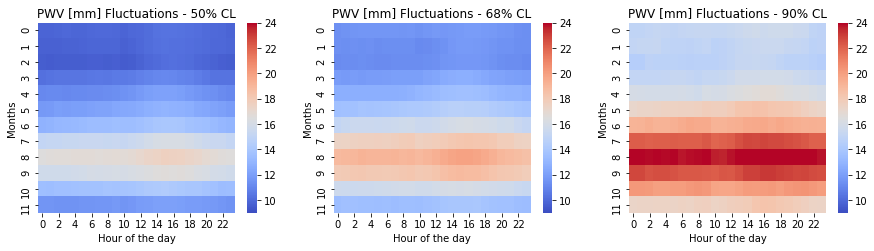

In [9]:
plt.figure(figsize=(15, 3.5))

plt.subplot(131)
plt.title("PWV [mm] Fluctuations - 50% CL")
sns.heatmap(seasonal_matrix_50, cmap="coolwarm", vmin=9, vmax=24)
plt.xlabel("Hour of the day")
plt.ylabel("Months")

plt.subplot(132)
plt.title("PWV [mm] Fluctuations - 68% CL")
sns.heatmap(seasonal_matrix_68, cmap="coolwarm", vmin=9, vmax=24)
plt.xlabel("Hour of the day")
plt.ylabel("Months")

plt.subplot(133)
plt.title("PWV [mm] Fluctuations - 90% CL")
sns.heatmap(seasonal_matrix_90, cmap="coolwarm", vmin=9, vmax=24)
plt.xlabel("Hour of the day")
plt.ylabel("Months")

plt.savefig("Seasonal_matrix.svg", format="svg")


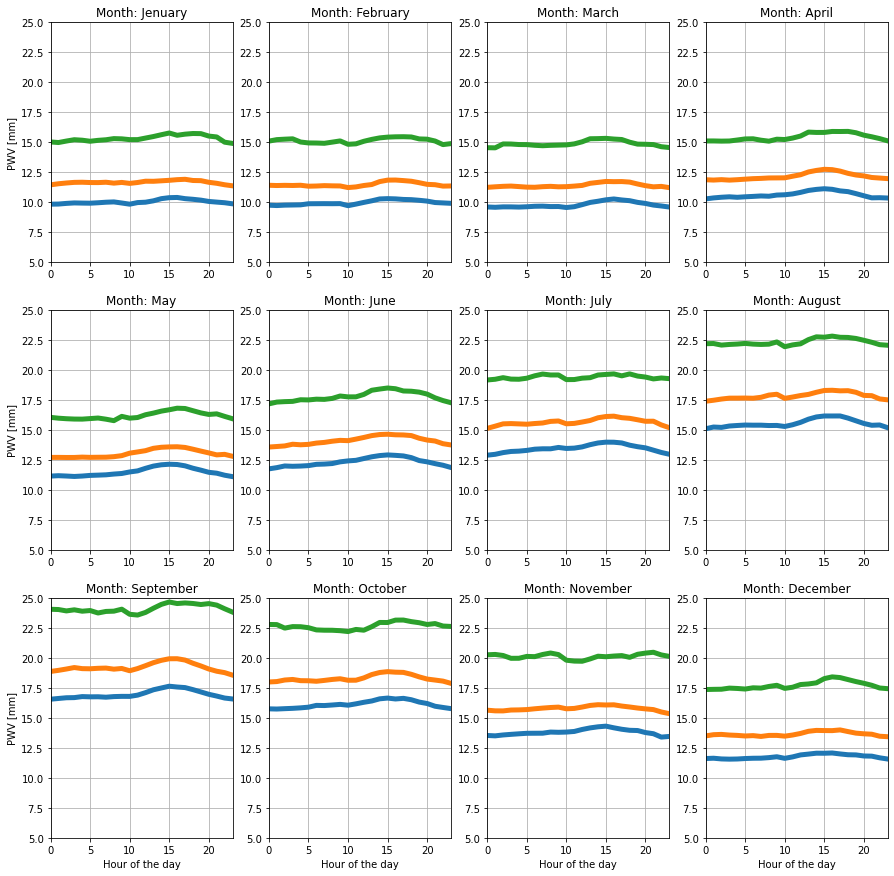

In [10]:
import matplotlib as mpl
mpl.rcParams['lines.linewidth'] = 5
months = ["Jenuary", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]

layout = np.zeros((3, 4), dtype=int)
for i in range(3):
    for j in range(4):
        layout[i, j] = 4*i + j + 1
axd = plt.figure(figsize=(15,15)).subplot_mosaic(layout, empty_sentinel=0)
for i in range(3):
    for j in range(4):
        axd[layout[i, j]].plot(seasonal_matrix_50[4*i+j,:])
        axd[layout[i, j]].plot(seasonal_matrix_68[4*i+j,:])
        axd[layout[i, j]].plot(seasonal_matrix_90[4*i+j,:])
        axd[layout[i, j]].set_ylim((5, 25))
        axd[layout[i, j]].set_xlim((0, 23))
        axd[layout[i, j]].set_title("Month: "+months[4*i+j])
        if (4*i+j) % 4 == 0:
            axd[layout[i, j]].set_xlabel("")
            axd[layout[i, j]].set_ylabel("PWV [mm]")
        if i == 2:
            axd[layout[i, j]].set_xlabel("Hour of the day")
        axd[layout[i, j]].grid()
            
plt.savefig("Months_plot.svg", format="svg")
            

In [4]:
# Create an average using 120 years of data realizations
!/usr/local/bin/mpirun --use-hwthread-cpus python make_average.py

Start to make average from 1900 to 2020...
You have to free at least: 7.119140625 MB
Comunicator size: 12
Years per thread: 10
Thread: 1 has taken in charge the year 1911
Thread: 2 has taken in charge the year 1921
Thread: 3 has taken in charge the year 1931
Thread: 4 has taken in charge the year 1941
Thread: 5 has taken in charge the year 1951
Thread: 6 has taken in charge the year 1961
Thread: 7 has taken in charge the year 1971
Thread: 8 has taken in charge the year 1981
Thread: 9 has taken in charge the year 1991
Thread: 10 has taken in charge the year 2001
Thread: 11 has taken in charge the year 2011
Thread: 0 has taken in charge the year 1901
Thread: 4 has taken in charge the year 1942
Thread: 0 has taken in charge the year 1902
Thread: 9 has taken in charge the year 1992
Thread: 7 has taken in charge the year 1972
Thread: 2 has taken in charge the year 1922
Thread: 8 has taken in charge the year 1982
Thread: 1 has taken in charge the year 1912
Thread: 3 has taken in charge the y

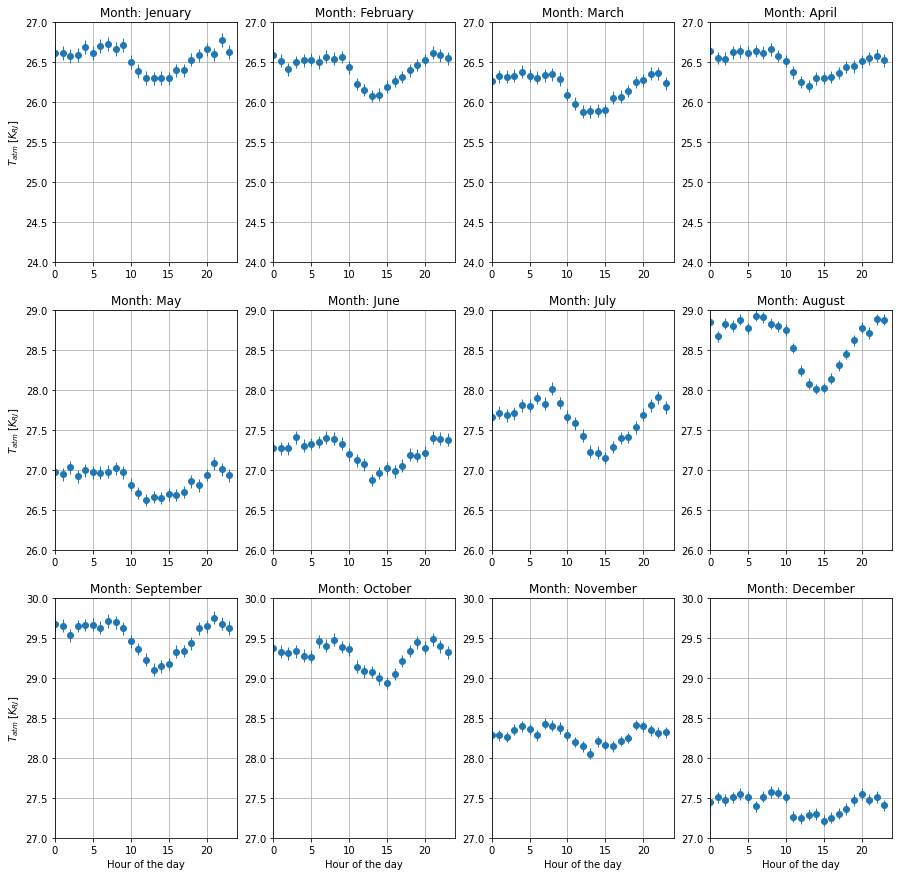

In [11]:
#np.save("t_atm_40GHz_K",t_atm_40GHz_K)
t_atm_40GHz_K = np.load("t_atm_par.npy")
mpl.rcParams['lines.linewidth'] = 1
t_atm_40GHz = np.median(t_atm_40GHz_K, axis=2)
std_dev = np.std(t_atm_40GHz_K[:, :, :], axis=2)/28
layout = np.zeros((3, 4), dtype=int)

years = 121
samples = 28

for i in range(3):
    for j in range(4):
        layout[i, j] = 4*i + j + 1
axd = plt.figure(figsize=(15,15)).subplot_mosaic(layout, empty_sentinel=0)
for i in range(3):
    for j in range(4):
        axd[layout[i, j]].errorbar(range(0, 24),t_atm_40GHz[i*4+j, :], std_dev[i-4+j, :], fmt='o')
        axd[layout[i, j]].set_xlim((0, 24))
        axd[layout[i, j]].set_title("Month: "+months[4*i+j])
        if (4*i+j) % 4 == 0:
            axd[layout[i, j]].set_xlabel("")
            axd[layout[i, j]].set_ylabel("$T_{atm}$ [$K_{RJ}$]")
        if i == 2:
            axd[layout[i, j]].set_xlabel("Hour of the day")
        axd[layout[i, j]].grid()
        
        if i == 0:
            axd[layout[i, j]].set_ylim((25.5, 27.0))
        if i == 1:
            axd[layout[i, j]].set_ylim((26.0, 29.0))
        if i == 2:
            axd[layout[i, j]].set_ylim((27.0, 30.0))
            
            